In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
import os

import scipy
from scipy import ndimage


# Parameters
img_size = 224
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_gen = train_datagen.flow_from_directory(
    "dataset/train",
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode="binary",
    subset="training"
)

val_gen = train_datagen.flow_from_directory(
    "dataset/train",
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode="binary",
    subset="validation"
)



from tensorflow.keras.models import load_model

model = load_model("my_model.h5")

loss, acc = model.evaluate(val_gen)
print(f"Validation Accuracy: {acc*100:.2f}%")


Found 6043 images belonging to 2 classes.
Found 1510 images belonging to 2 classes.
48/48 [==============================] - 79s 2s/step - loss: 0.0474 - accuracy: 0.9861
Validation Accuracy: 98.61%


1/1 [==============================] - 0s 321ms/step
dataset/test/with_mask\with_mask_1.jpg: Mask Detected 😷


1/1 [==============================] - 0s 159ms/step
dataset/test/without_mask\without_mask_10.jpg: No Mask Detected 😐


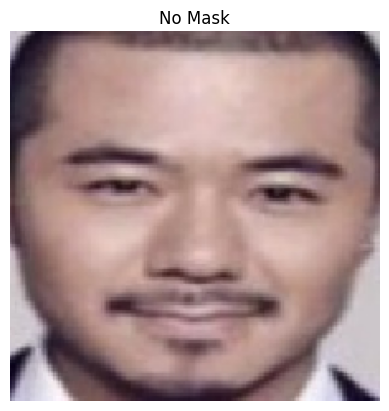

In [4]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
def predict_mask(img_path):
    img = image.load_img(img_path, target_size=(img_size, img_size))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    pred = model.predict(img_array)[0][0]
    if pred < 0.5:
        print(f"{img_path}: Mask Detected 😷")
        label="Mask"
    else:
        print(f"{img_path}: No Mask Detected 😐")
        label="No Mask"
    # Show image with label
    plt.imshow(img)
    plt.axis('off')
    plt.title(label)
    plt.show()
test_with_mask_dir = "dataset/test/with_mask"
test_without_mask_dir = "dataset/test/without_mask"


if os.path.exists(test_with_mask_dir) and os.listdir(test_with_mask_dir):
    first_with_mask_img = os.path.join(test_with_mask_dir, os.listdir(test_with_mask_dir)[0])
    predict_mask(first_with_mask_img)
else:
    print(f"No images found in {test_with_mask_dir}")

if os.path.exists(test_without_mask_dir) and os.listdir(test_without_mask_dir):
    first_without_mask_img = os.path.join(test_without_mask_dir, os.listdir(test_without_mask_dir)[1])
    predict_mask(first_without_mask_img)
else:
    print(f"No images found in {test_without_mask_dir}")